In [110]:
"""
The purpose of this notebook is to do exploratory analysis of the spotify hits data and determine what is popular.
As well as see what kind of trends there are over time in Spotify's top songs.
"""

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)  # Annoying
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import sqlite3

In [52]:
database_file_path = "../data/raw_spotify_charts_data.db"
data_table = "spotify_hits_2017_to_2021"

conn = sqlite3.connect(database_file_path)
pd.read_sql_query(f"SELECT * FROM {data_table} LIMIT 10;", conn)

,date,artist,country,chart,trend,streams
0,2017-01-01T00:00:00,Shakira,Argentina,top200,SAME_POSITION,253019
1,2017-01-01T00:00:00,Ricky Martin,Argentina,top200,MOVE_UP,223988
2,2017-01-01T00:00:00,CNCO,Argentina,top200,MOVE_DOWN,210943
3,2017-01-01T00:00:00,"J Balvin, Pharrell Williams, BIA, Sky",Argentina,top200,SAME_POSITION,173865
4,2017-01-01T00:00:00,Daddy Yankee,Argentina,top200,MOVE_UP,153956
5,2017-01-01T00:00:00,Sebastian Yatra,Argentina,top200,MOVE_DOWN,151140
6,2017-01-01T00:00:00,Rombai,Argentina,top200,MOVE_DOWN,148369
7,2017-01-01T00:00:00,Zion & Lennox,Argentina,top200,MOVE_DOWN,143004
8,2017-01-01T00:00:00,"Carlos Vives, Shakira",Argentina,top200,MOVE_UP,126389
9,2017-01-01T00:00:00,Ozuna,Argentina,top200,MOVE_DOWN,112012


In [53]:
# Creating a dataframe for visualization to display the total number of songs per country

countries = pd.read_sql_query(
    f"SELECT country, count(*) AS total_songs  FROM {data_table} GROUP BY country;",
    conn,
)
countries.head()

,country,total_songs
0,Andorra,79592
1,Argentina,455308
2,Australia,453103
3,Austria,454593
4,Belgium,449319


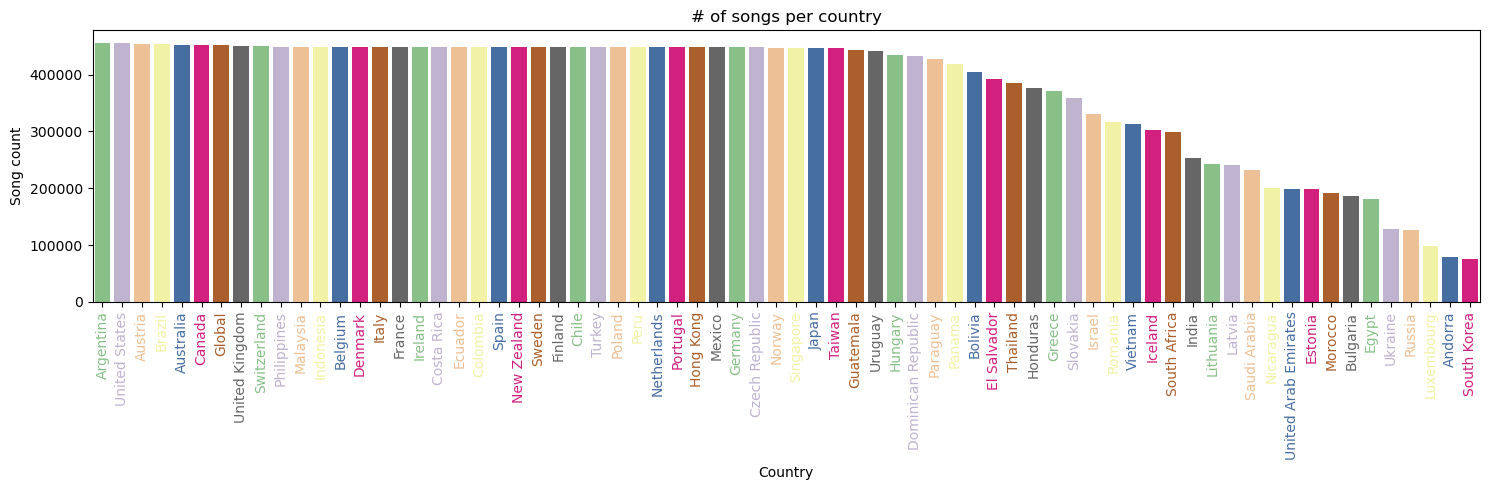

In [54]:
fig, ax = plt.subplots(figsize=(15, 5))
bars = sns.barplot(
    data=countries.sort_values(by="total_songs", ascending=False),
    x="country",
    y="total_songs",
    ax=ax,
    palette="Accent",
)
ax.set_title("# of songs per country")
ax.set_xlabel("Country")
ax.set_ylabel("Song count")
ax.tick_params(axis="x", labelrotation=90)
[
    label.set_color(bar.get_facecolor())
    for bar, label in zip(bars.patches, ax.get_xticklabels())
]
plt.tight_layout()
plt.show()
fig.savefig("../reports/figures/number-of-songs-per-country.png")

In [55]:
# Creating a dataframe for visualization to display the total amount of streams per country

countries = pd.read_sql_query(
    f"SELECT country, SUM(streams) AS total_streams  FROM {data_table} GROUP BY country;",
    conn,
)
countries.head()

,country,total_streams
0,Andorra,0
1,Argentina,19533812932
2,Australia,20128208340
3,Austria,2703190809
4,Belgium,3883142609


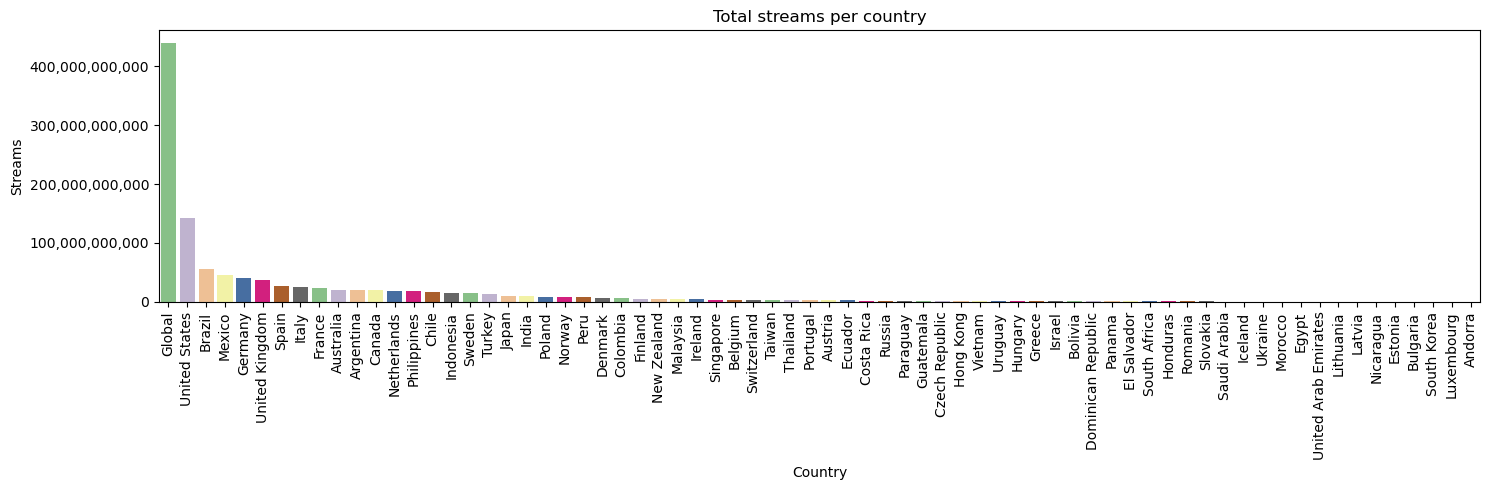

In [56]:
fig_1, ax_1 = plt.subplots(figsize=(15, 5))
bars = sns.barplot(
    data=countries.sort_values(by="total_streams", ascending=False),
    x="country",
    y="total_streams",
    ax=ax_1,
    palette="Accent",
)
ax_1.set_title("Total streams per country")
ax_1.set_xlabel("Country")
ax_1.set_ylabel("Streams")
ax_1.tick_params(axis="x", labelrotation=90)
[
    label.set_color(bar.get_facecolor())
    for bar, label in zip(bars.patches, ax.get_xticklabels())
]
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.tight_layout()
plt.show()
fig.savefig("../reports/figures/total-streams-per-country.png")

#### Songs
It looks like most countries with fewer songs are in the middle east, Africa and some asian countries.
I did not expect to see Argentina or Austria so high up in the list, especially since
as an avid listener of music, I've never really heard of any particular artist even being from those areas.
It would be interesting to see data according to what language is used in each song, as I know that a 
lot of artists from countries where the offical language is not english make music in english.
#### Streams
I had really thought that it seemed weird that there were so many songs in so many other countries.
But now I think that the data makes a bit more sense, seeing the streams data. To me at least, it makes
sense that the US would be dominating here, as the US tends to do that with certain things, especially with
Spotify being from the US. The global category is a bit strange, I'm not quite sure what to make of that.
Maybe it is for songs with multiple artists.

In [57]:
pd.read_sql_query(f"SELECT * FROM {data_table} LIMIT 10", conn)

,date,artist,country,chart,trend,streams
0,2017-01-01T00:00:00,Shakira,Argentina,top200,SAME_POSITION,253019
1,2017-01-01T00:00:00,Ricky Martin,Argentina,top200,MOVE_UP,223988
2,2017-01-01T00:00:00,CNCO,Argentina,top200,MOVE_DOWN,210943
3,2017-01-01T00:00:00,"J Balvin, Pharrell Williams, BIA, Sky",Argentina,top200,SAME_POSITION,173865
4,2017-01-01T00:00:00,Daddy Yankee,Argentina,top200,MOVE_UP,153956
5,2017-01-01T00:00:00,Sebastian Yatra,Argentina,top200,MOVE_DOWN,151140
6,2017-01-01T00:00:00,Rombai,Argentina,top200,MOVE_DOWN,148369
7,2017-01-01T00:00:00,Zion & Lennox,Argentina,top200,MOVE_DOWN,143004
8,2017-01-01T00:00:00,"Carlos Vives, Shakira",Argentina,top200,MOVE_UP,126389
9,2017-01-01T00:00:00,Ozuna,Argentina,top200,MOVE_DOWN,112012


Compare list:
artists TO streams
countries TO streams
countries TO chart
songs in countries TO dates

In [58]:
"""
After looking through the data a little and trying to make the below plot,
I have found that there are some massive outliers in the data that make it
very difficult to visualize properly, so I got rid of every artist with over
5000 songs (Seems ridiculously impossible anyways, they're probably some kind
of instrumental artist or something), as well as rows where artists have 0 streams.
"""

artists_sum_streams_num_songs = pd.read_sql_query(
    f"SELECT SUM(streams) as total_streams, count(*) AS num_songs FROM {data_table} GROUP BY artist;",
    conn,
)
filtered_artists_data = artists_sum_streams_num_songs[
    artists_sum_streams_num_songs["total_streams"] != 0
]
filtered_artists_data["num_songs"] = filtered_artists_data["num_songs"][
    filtered_artists_data["num_songs"] < 5000
]
filtered_artists_data = filtered_artists_data.sort_values(by="total_streams")

C:\Users\OMEN\AppData\Local\Temp\ipykernel_12092\4185077091.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_artists_data['num_songs'] = filtered_artists_data['num_songs'][filtered_artists_data['num_songs'] < 5000]


In [59]:
# Right here I am just trying to get a quick look at the data before I create a new visualization

filtered_artists_data.dtypes, filtered_artists_data.head(), filtered_artists_data[
    "num_songs"
].max(), filtered_artists_data.describe()

(total_streams      int64
 num_songs        float64
 dtype: object,
        total_streams  num_songs
 88488           1001        1.0
 17344           1001       36.0
 79212           1001        1.0
 43507           1001       11.0
 54624           1002        1.0,
 4991.0,
        total_streams     num_songs
 count   4.017700e+04  39309.000000
 mean    2.795169e+07    248.593554
 std     3.253669e+08    601.675784
 min     1.001000e+03      1.000000
 25%     3.126400e+04      7.000000
 50%     2.567290e+05     37.000000
 75%     2.652267e+06    185.000000
 max     2.359566e+10   4991.000000)

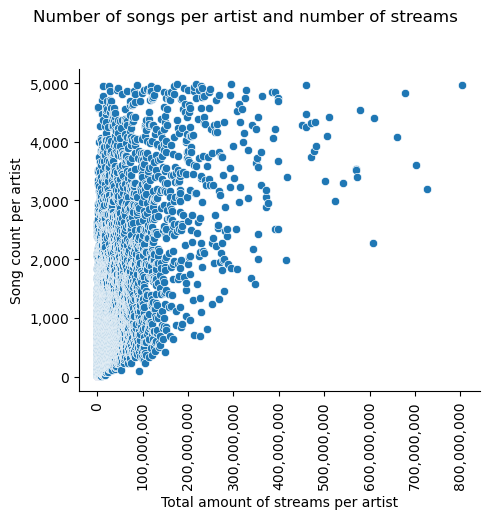

In [60]:
g = sns.relplot(data=filtered_artists_data, x="total_streams", y="num_songs")
g.fig.suptitle("Number of songs per artist and number of streams", y=1.03)
g.set_axis_labels("Total amount of streams per artist", "Song count per artist")
for ax in g.axes.flat:
    ax.tick_params(axis="x", labelrotation=90)
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.tight_layout()
g.fig.savefig("../reports/figures/number-of-songs-per-artist-and-number-of-streams.png")
plt.show()

In [80]:
"""
Here I am going to create some bins from the country data.
There are 70 different countries in the dataset, and I would like to know
more about how streams increase over time, and there are too many countries
in the dataset to make sensible 
"""
sorted_regions = {
    "latin_america": [
        "Argentina",
        "Brazil",
        "Chile",
        "Colombia",
        "Costa Rica",
        "Dominican Republic",
        "Ecuador",
        "El Salvador",
        "Guatemala",
        "Honduras",
        "Mexico",
        "Nicaragua",
        "Panama",
        "Peru",
        "Paraguay",
        "Uruguay"
    ],
    "english_america": ["United States", "Canada"],
    "west_europe": [
        "Andorra",
        "Austria",
        "Belgium",
        "Czech Republic",
        "Denmark",
        "Finland",
        "France",
        "Germany",
        "Greece",
        "Iceland",
        "Ireland",
        "Italy",
        "Luxembourg",
        "Netherlands",
        "Norway",
        "Poland",
        "Portugal",
        "Spain",
        "Sweden",
        "Switzerland",
        "United Kingdom"
    ],
    "east_europe": [
        "Bulgaria",
        "Estonia",
        "Hungary",
        "Latvia",
        "Lithuania",
        "Romania",
        "Russia",
        "Slovakia",
        "Turkey",
        "Ukraine"
    ],
    "east_asia": [
        "Hong Kong",
        "Japan",
        "Malaysia",
        "Indonesia",
        "Singapore",
        "South Korea",
        "Taiwan",
        "Thailand",
        "Vietnam"
    ],
    "middle_east_north_africa_west_asia": [
        "Egypt",
        "India",
        "Israel",
        "Morocco",
        "Saudi Arabia",
        "United Arab Emirates"
    ],
    "glbl": ["global"]
}
(
    len(sorted_regions['latin_america'])
    + len(sorted_regions['english_america'])
    + len(sorted_regions['west_europe'])
    + len(sorted_regions['east_europe'])
    + len(sorted_regions['east_asia'])
    + len(sorted_regions['middle_east_north_africa_west_asia'])
    + len(sorted_regions['glbl'])
)

65

In [84]:
"""
Here I am going to create a data frame with a date column and a column with the same name as
all the lists in the previous cell that are going to be bins of the total streams and songs for them.
It may not be the best way to visualize this data and get an accurate understanding of listening trends
But for this exercise I think it will do just fine.
"""

def format_for_sql(regions):
    case_statements = []
    for region_key, region_values in regions.items():
        case_statements.append(f"SUM(CASE WHEN country IN ('" + "', '".join(region_values) + f"') THEN streams ELSE 0 END) AS {region_key}_streams")

    select_statement = (
        f"SELECT date, " + ", ".join(case_statements) + f" FROM {data_table} "
        "GROUP BY date "
        "ORDER BY date ASC"
    )
    return select_statement

country_bins = pd.read_sql_query(format_for_sql(sorted_regions), conn)
country_bins.head(10)

,date,latin_america_streams,english_america_streams,west_europe_streams,east_europe_streams,east_asia_streams,middle_east_north_africa_west_asia_streams,glbl_streams
0,2017-01-01T00:00:00,47990357,61744489,62731404,1892987,6050326,0,0
1,2017-01-02T00:00:00,42945594,54475092,74393751,2329408,6845557,0,0
2,2017-01-03T00:00:00,45369979,61326595,75931394,2416629,7757503,0,0
3,2017-01-04T00:00:00,45469305,62359684,78597698,2392724,7945330,0,0
4,2017-01-05T00:00:00,45804958,62647398,80091071,2318478,7832443,0,0
5,2017-01-06T00:00:00,48477472,66338168,86265901,2529718,7963739,0,0
6,2017-01-07T00:00:00,48459555,60732586,88798202,2467198,7548740,0,0
7,2017-01-08T00:00:00,41603140,57350257,79540677,2276119,7454827,0,0
8,2017-01-09T00:00:00,44947048,62914039,83385188,2313631,8337671,0,0
9,2017-01-10T00:00:00,45628752,65261198,83245978,2357040,8345868,0,0


In [88]:
# I've replaced all null values in the data with 0 so that I can get the
# cumulative sum for each column.

for col in country_bins.columns:
    print(f'Column: {col} has {len(country_bins[col][country_bins[col] == 0])} values that == 0')

Column: date has 0 values that == 0
Column: latin_america_streams has 3 values that == 0
Column: english_america_streams has 3 values that == 0
Column: west_europe_streams has 3 values that == 0
Column: east_europe_streams has 10 values that == 0
Column: east_asia_streams has 34 values that == 0
Column: middle_east_north_africa_west_asia_streams has 447 values that == 0
Column: glbl_streams has 1826 values that == 0


In [96]:
cumsum_country_bins = country_bins.drop('date', axis = 1).cumsum()
cumsum_country_bins.insert(0, 'date', pd.to_datetime(country_bins['date']).dt.strftime('%m-%d-%Y'))
cumsum_country_bins.head(10)

,date,latin_america_streams,english_america_streams,west_europe_streams,east_europe_streams,east_asia_streams,middle_east_north_africa_west_asia_streams,glbl_streams
0,01-01-2017,47990357,61744489,62731404,1892987,6050326,0,0
1,01-02-2017,90935951,116219581,137125155,4222395,12895883,0,0
2,01-03-2017,136305930,177546176,213056549,6639024,20653386,0,0
3,01-04-2017,181775235,239905860,291654247,9031748,28598716,0,0
4,01-05-2017,227580193,302553258,371745318,11350226,36431159,0,0
5,01-06-2017,276057665,368891426,458011219,13879944,44394898,0,0
6,01-07-2017,324517220,429624012,546809421,16347142,51943638,0,0
7,01-08-2017,366120360,486974269,626350098,18623261,59398465,0,0
8,01-09-2017,411067408,549888308,709735286,20936892,67736136,0,0
9,01-10-2017,456696160,615149506,792981264,23293932,76082004,0,0


In [107]:
cumsum_country_bins = cumsum_country_bins.set_index('date')
cumsum_country_bins.head(10)

,latin_america_streams,english_america_streams,west_europe_streams,east_europe_streams,east_asia_streams,middle_east_north_africa_west_asia_streams,glbl_streams
date,,,,,,,
01-01-2017,47990357,61744489,62731404,1892987,6050326,0,0
01-02-2017,90935951,116219581,137125155,4222395,12895883,0,0
01-03-2017,136305930,177546176,213056549,6639024,20653386,0,0
01-04-2017,181775235,239905860,291654247,9031748,28598716,0,0
01-05-2017,227580193,302553258,371745318,11350226,36431159,0,0
01-06-2017,276057665,368891426,458011219,13879944,44394898,0,0
01-07-2017,324517220,429624012,546809421,16347142,51943638,0,0
01-08-2017,366120360,486974269,626350098,18623261,59398465,0,0
01-09-2017,411067408,549888308,709735286,20936892,67736136,0,0


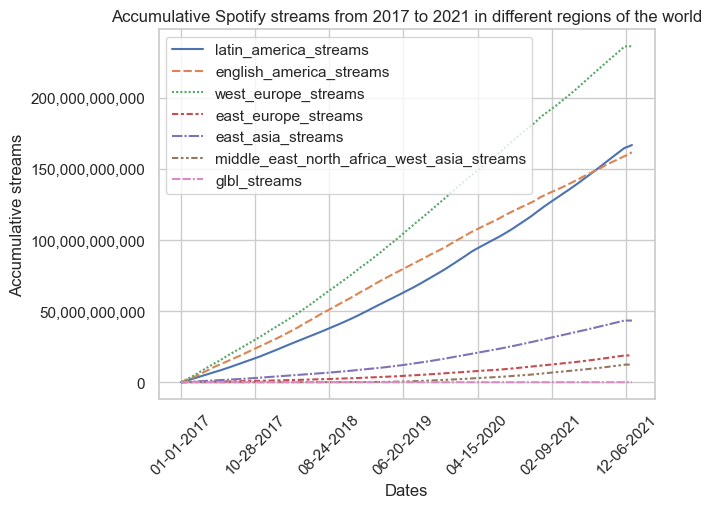

In [114]:
fig_2, ax_2 = plt.subplots()
g = sns.set_theme(style = 'whitegrid')
sns.lineplot(data = cumsum_country_bins, ax = ax_2)
ax_2.tick_params(axis="x", labelrotation=45)
ax_2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax_2.xaxis.set_major_locator(ticker.MaxNLocator(8))
ax_2.set_title('Accumulative Spotify streams from 2017 to 2021 in different regions of the world')
ax_2.set_ylabel('Accumulative streams')
ax_2.set_xlabel('Dates')
fig.savefig('../reports/figures/cumulative-streams-in-separated-regions.png')

It seems that streams are decreasing slighty for some countries, but not for latin america.

In [50]:
conn.close()